In [56]:
import sys
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
%cd ..\columnas
import columnas_utils as col
%cd ..\memoria_calculo
import latex_utils as ltx
%matplotlib inline

D:\programas\ingenieria estructural\concreto\columnas
D:\programas\ingenieria estructural\concreto\memoria_calculo


In [79]:
os.getcwd()

'D:\\programas\\ingenieria estructural\\concreto\\memoria_calculo'

In [57]:
# Definicion de las unidades
N = 1
m = 1
cm = 1/100
Pa = 1
MPa = 10**6
pulg = 2.54 / 100

# Definicion de varillas de acero:
d_3 = 3/8 * pulg
d_4 = 1/2 * pulg
d_5 = 5/8 * pulg
d_6 = 3/4 * pulg
d_8 = 1 * pulg

A_3 = d_3 ** 2 /4 * math.pi
A_4 = d_4 ** 2 /4 * math.pi
A_5 = d_5 ** 2 /4 * math.pi
A_6 = d_6 ** 2 /4 * math.pi
A_8 = d_8 ** 2 /4 * math.pi

In [63]:
datos_proyecto = {
    'ubicacion': 'AV. SIMPRE VIVA – AYUDA MUTUA Lt 03 Mz 03',
    'distrito': 'CUSCO',
    'provincia': 'CUSCO',
    'departamento': 'CUCO'
}

for key, value in datos_proyecto.items():
    ltx.save_var_ltx(key,value,'data.txt')

In [66]:
#Dimensiones de la columna
b = 40*cm
h = 30*cm
r = 4*cm
l = 5*m
column = col.Column(b, h, r, l)

# Concreto
fc = 21*MPa #Resistencia a la compresion
eps_u = 0.003 #Deformación unitaria ultima
column.set_concrete(fc, eps_u)

#Acero de refuerzo
fy = 420*MPa #Esfuerzo a la fluencia del acero
Es = 200000*MPa #Módulo de elasticidad del acero
eps_y = fy/Es #Deformación de fluencia del acero
column.set_steel_reb(fy, Es)

d_p = d_5 #diámetro principal
d_s = d_5 #diámetro secundario
d_st = d_3 #diámetro del estribo
n_f = 6  #filas de acero
n_c = 3 #columnas de acero
column.set_rebar(d_p, d_s, d_st, n_f, n_c)

#factor de minoración
phi = 0.65
column.compress_resist(phi)
print('Resistencia a la compresión pura reducida: {:.2f} N'.format(column.phiP_n))

Resistencia a la compresión pura reducida: 1693317.80 N


In [74]:
#Importación de cargas
cargas = pd.read_csv('cargas.csv',sep=';')

#Conversion de unidades
cargas.P = cargas.P*9.81*10**3
cargas.M2 = cargas.M2*9.81*10**3
cargas.M3 = cargas.M3*9.81*10**3

In [68]:
cargas = cargas[['Combinacion','P','M2','M3']]

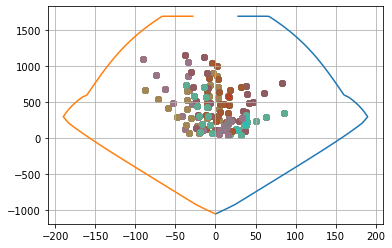

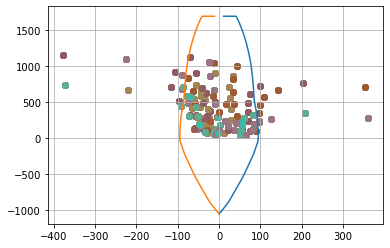

In [69]:
#Diagrama de flexocompresión:
column.biaxial_flex_comp()

#Flexocompresión en x
fig, ax = plt.subplots()
column.plot_f_c(ax,loads=cargas,axis='x')
plt.grid()
plt.savefig("diag_x.jpg", dpi=600)
plt.show()

#Felxocompresion en y
fig, ax = plt.subplots()
column.plot_f_c(ax,loads=cargas,axis='y')
plt.grid()
plt.savefig("diag_y.jpg", dpi=600)
plt.show()

In [70]:
#guardar datos
data_col = {
    'b': b,
    'h': h,
    'r_e': r,
    'phi_c': 0.65,
    'f_c': fc,
    'A_g':column.Ag,
    'A_st':column.Aref,
    'f_y': fy,
    'P_n': column.phiP_n,
}

for key, value in data_col.items():
    ltx.save_var_ltx(key,round(value,4),'data_col.txt')

In [71]:
tabla = open('tabla.tex','w')
tab = cargas.head(24)
tabla.write(tab.to_latex(index = False))

C:\Users\nohav\AppData\Local\Temp\ipykernel_2120\359400690.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabla.write(tab.to_latex(index = False))


1466

In [77]:
tab.to_latex(index = False)

C:\Users\nohav\AppData\Local\Temp\ipykernel_2120\1060390228.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tab.to_latex(index = False)


'\\begin{tabular}{lrrr}\n\\toprule\nCombinacion &            P &         M2 &         M3 \\\\\n\\midrule\n       1.4D &  -127502.532 & -13109.103 & -37897.992 \\\\\n       1.4D &  -110630.313 &  10006.200 &  56115.162 \\\\\n       1.4D &  -277824.105 & -10789.038 & -43266.024 \\\\\n       1.4D &  -260951.886 &   4777.470 &  28345.014 \\\\\n       1.4D &  -429920.307 &  -8866.278 & -45508.590 \\\\\n       1.4D &  -413048.088 &   4117.257 &  27897.678 \\\\\n       1.4D &  -582035.148 &  -7961.796 & -44780.688 \\\\\n       1.4D &  -565162.929 &   3724.857 &  26709.687 \\\\\n       1.4D &  -733437.783 &  -6946.461 & -56010.195 \\\\\n       1.4D &  -716565.564 &   2536.866 &  23631.309 \\\\\n       1.4D &  -909355.608 &  -3005.784 & -10745.874 \\\\\n       1.4D &  -870852.339 &   1785.420 &  33757.191 \\\\\n  1.2D+1.6L &  -128712.105 & -11286.405 & -59613.408 \\\\\n  1.2D+1.6L &  -114250.203 &  11640.546 &  54711.351 \\\\\n  1.2D+1.6L &  -318571.902 & -11462.004 & -55777.698 \\\\\n  1.2D+1.

In [78]:
ltx.compile()

In [73]:
ltx.save_var_ltx('b','5','data.txt')